In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#funtion to fill Nan's into X with Y value, default value is 0
def null_replace(x, y=0):
    return x.fillna(y)

#funtion to transform X datatype to datetime
def force_date(x):
    return pd.to_datetime(x, errors='coerce')

#funtion standardize column names to default python snake form, Y parameter can be changed to a diferent disered value
def std_data(x, y='_'):
#     x.columns = [e.lower().replace(' ','_' for e in x)]
    x.columns = list(map(lambda el: el.lower().replace(' ',y), x))
    return x.drop(['unnamed:_0'], axis=1)

#Main operations funtion
def data_crunch(dataset):

    #Standardizing dataset
    dataset = std_data(dataset)
    
    #printing numerical and categorical columns
    print('Numerical Columns \n', list(dataset.select_dtypes(np.number).columns), '\n')
    print('Categorical Columns: \n', list(dataset.select_dtypes(['object']).columns))
    
    #Trating Nan Values and droping empty rows, and not usefull rows
    dataset = dataset.drop_duplicates()
    dataset['response'] = null_replace(dataset['response'],'No')
    dataset['months_since_last_claim'] = null_replace(dataset['months_since_last_claim'])
    dataset['number_of_open_complaints'] = null_replace(dataset['number_of_open_complaints'])
    
    dataset = dataset.drop(['customer', 'vehicle_type'], axis=1)
    
    dataset['vehicle_size'] = null_replace(dataset['vehicle_size'],'Medsize')
    dataset['vehicle_class'] = null_replace(dataset['vehicle_class'],'Four-Door Car')
    dataset['state'] = null_replace(dataset['state'],'Other State')
    
    dataset['vehicle_class'] = dataset['vehicle_class'].replace(['Sports Car','Luxury SUV'],'Luxury Car')
    
    
    #Fixing the efective to date column data type and adding a column with the months
    dataset['effective_to_date'] = force_date(dataset['effective_to_date'])
    dataset['month'] = pd.DatetimeIndex(dataset['effective_to_date']).month
    
    #reseting the dataset
    dataset = dataset.reset_index(drop=True)
    
    return dataset

data = pd.read_csv('marketing_customer_analysis.csv')
data = data_crunch(data)

data[(data['month'].isin([1,2,3]))]


Numerical Columns 
 ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] 

Categorical Columns: 
 ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10869,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10870,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury Car,Medsize,2
10871,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Round 3

Showing data frame info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10873 non-null  object        
 1   customer_lifetime_value        10873 non-null  float64       
 2   response                       10873 non-null  object        
 3   coverage                       10873 non-null  object        
 4   education                      10873 non-null  object        
 5   effective_to_date              10873 non-null  datetime64[ns]
 6   employmentstatus               10873 non-null  object        
 7   gender                         10873 non-null  object        
 8   income                         10873 non-null  int64         
 9   location_code                  10873 non-null  object        
 10  marital_status                 10873 non-null  object        
 11  monthly_premium

Describing the data frame, in transposed form for easier reading

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly_premium_auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10873.0,14.277292,10.399697,0.000000,5.000000,13.000000,23.000000,35.000000
months_since_policy_inception,10873.0,48.098777,27.929932,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10873.0,0.361538,0.889177,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10873.0,2.977467,2.397752,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678
month,10873.0,1.466661,0.498910,1.000000,1.000000,1.000000,2.000000,2.000000


Total response plot 

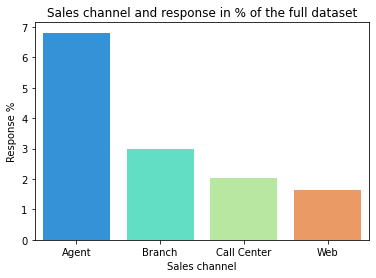

In [5]:
f_plot = data.loc[data['response'] == 'Yes', ['sales_channel', 'response']]
lines = len(data)
f_plot = f_plot.groupby(['sales_channel']).size().reset_index(name='counts')
f_plot['counts'] = f_plot['counts']/lines*100


sns.barplot(x='sales_channel', y='counts',data=f_plot, palette='rainbow')
plt.xlabel('Sales channel')
plt.ylabel('Response %')
plt.title('Sales channel and response in % of the full dataset')
plt.show()

Response rate by the sales channel.

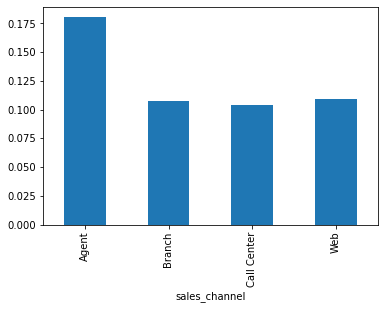

In [6]:
data['response_rate'] = np.where(data['response'] == 'Yes',1,0)
data.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

Response rate by income

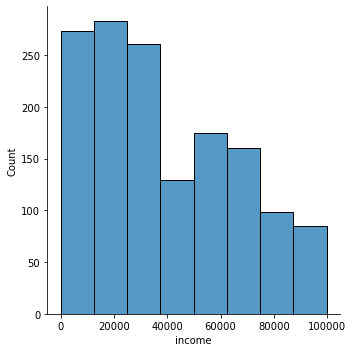

In [7]:
sns.displot(x='income',data=data[data['response_rate']==1], palette='rainbow', bins=8)
plt.show()

Response rate by total claim amount

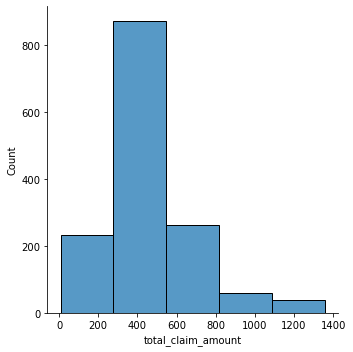

In [8]:
sns.displot(x='total_claim_amount',data=data[data['response_rate']==1], palette='rainbow', bins=5)
plt.show()

Check the data types of the columns

In [9]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

Droping previously cretated columns to graphs

In [10]:
data = data.drop(['response_rate'], axis=1)

Getting the numerical and categorical data into separate dataframes

In [11]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes('object')

numerical = numerical.drop(['month', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'month'], axis=1)
# Removing no income rows idea
# numerical = numerical[numerical['income']>0]
numerical.head()


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000
3,22332.439460,49078,97,484.013411
4,9025.067525,23675,117,707.925645


Checking the normality of values

In [12]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly_premium_auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
total_claim_amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678


As we can observe total_claim_amount, customer_lifetime_value have massive ranges so we have to address this later

Distribution plots for the numerical variables

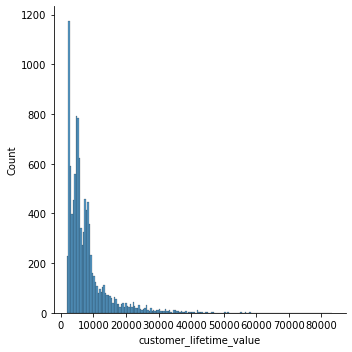

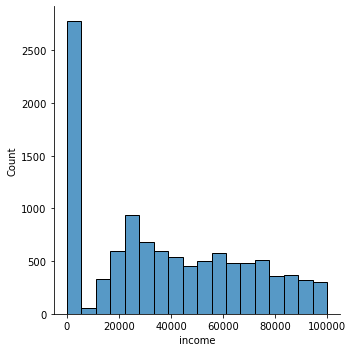

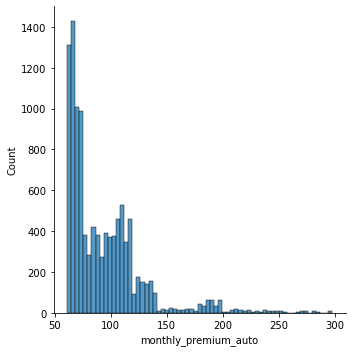

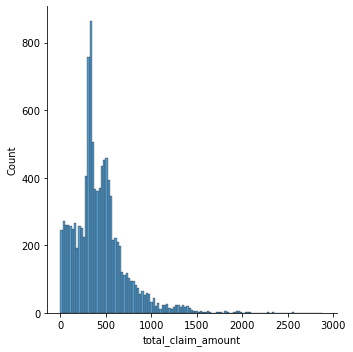

In [13]:
for i, column in enumerate(numerical.columns, 1):
    sns.displot(numerical[column])

Checking the graphs while aplying the standard trimms of values using the percentiles

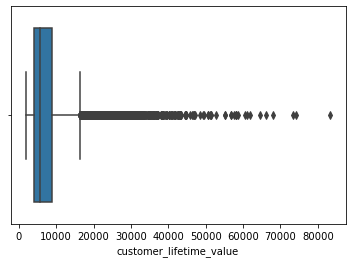

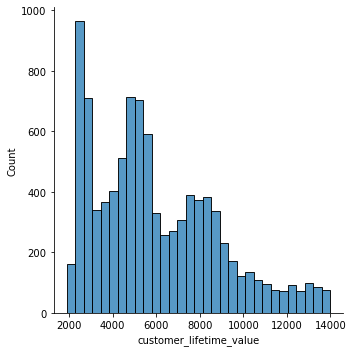

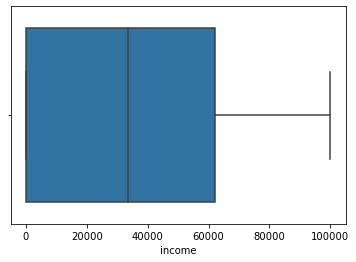

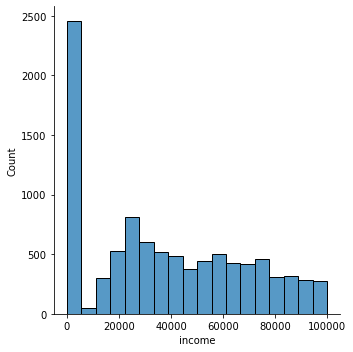

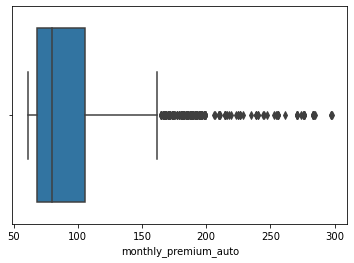

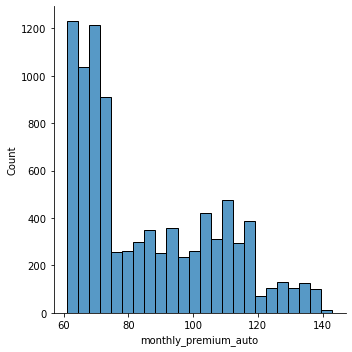

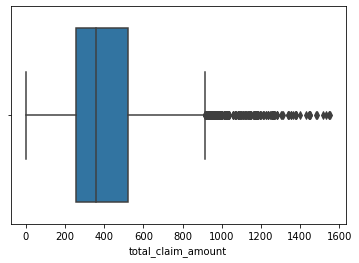

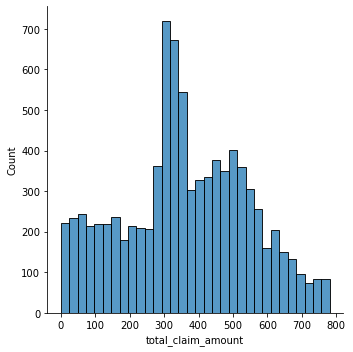

In [14]:
for column in numerical.columns:   
    sns.boxplot(x=numerical[column])
    plt.show()
    iqr = np.percentile(numerical[column],75) - np.percentile(numerical[column],25)
    numerical = numerical[(numerical[column]>np.percentile(numerical[column],25) - 1*iqr) & (numerical[column]<np.percentile(numerical[column],75) + 1*iqr)].copy()
    sns.displot(numerical[column])
    plt.show()


Evaluating the histograms as requested

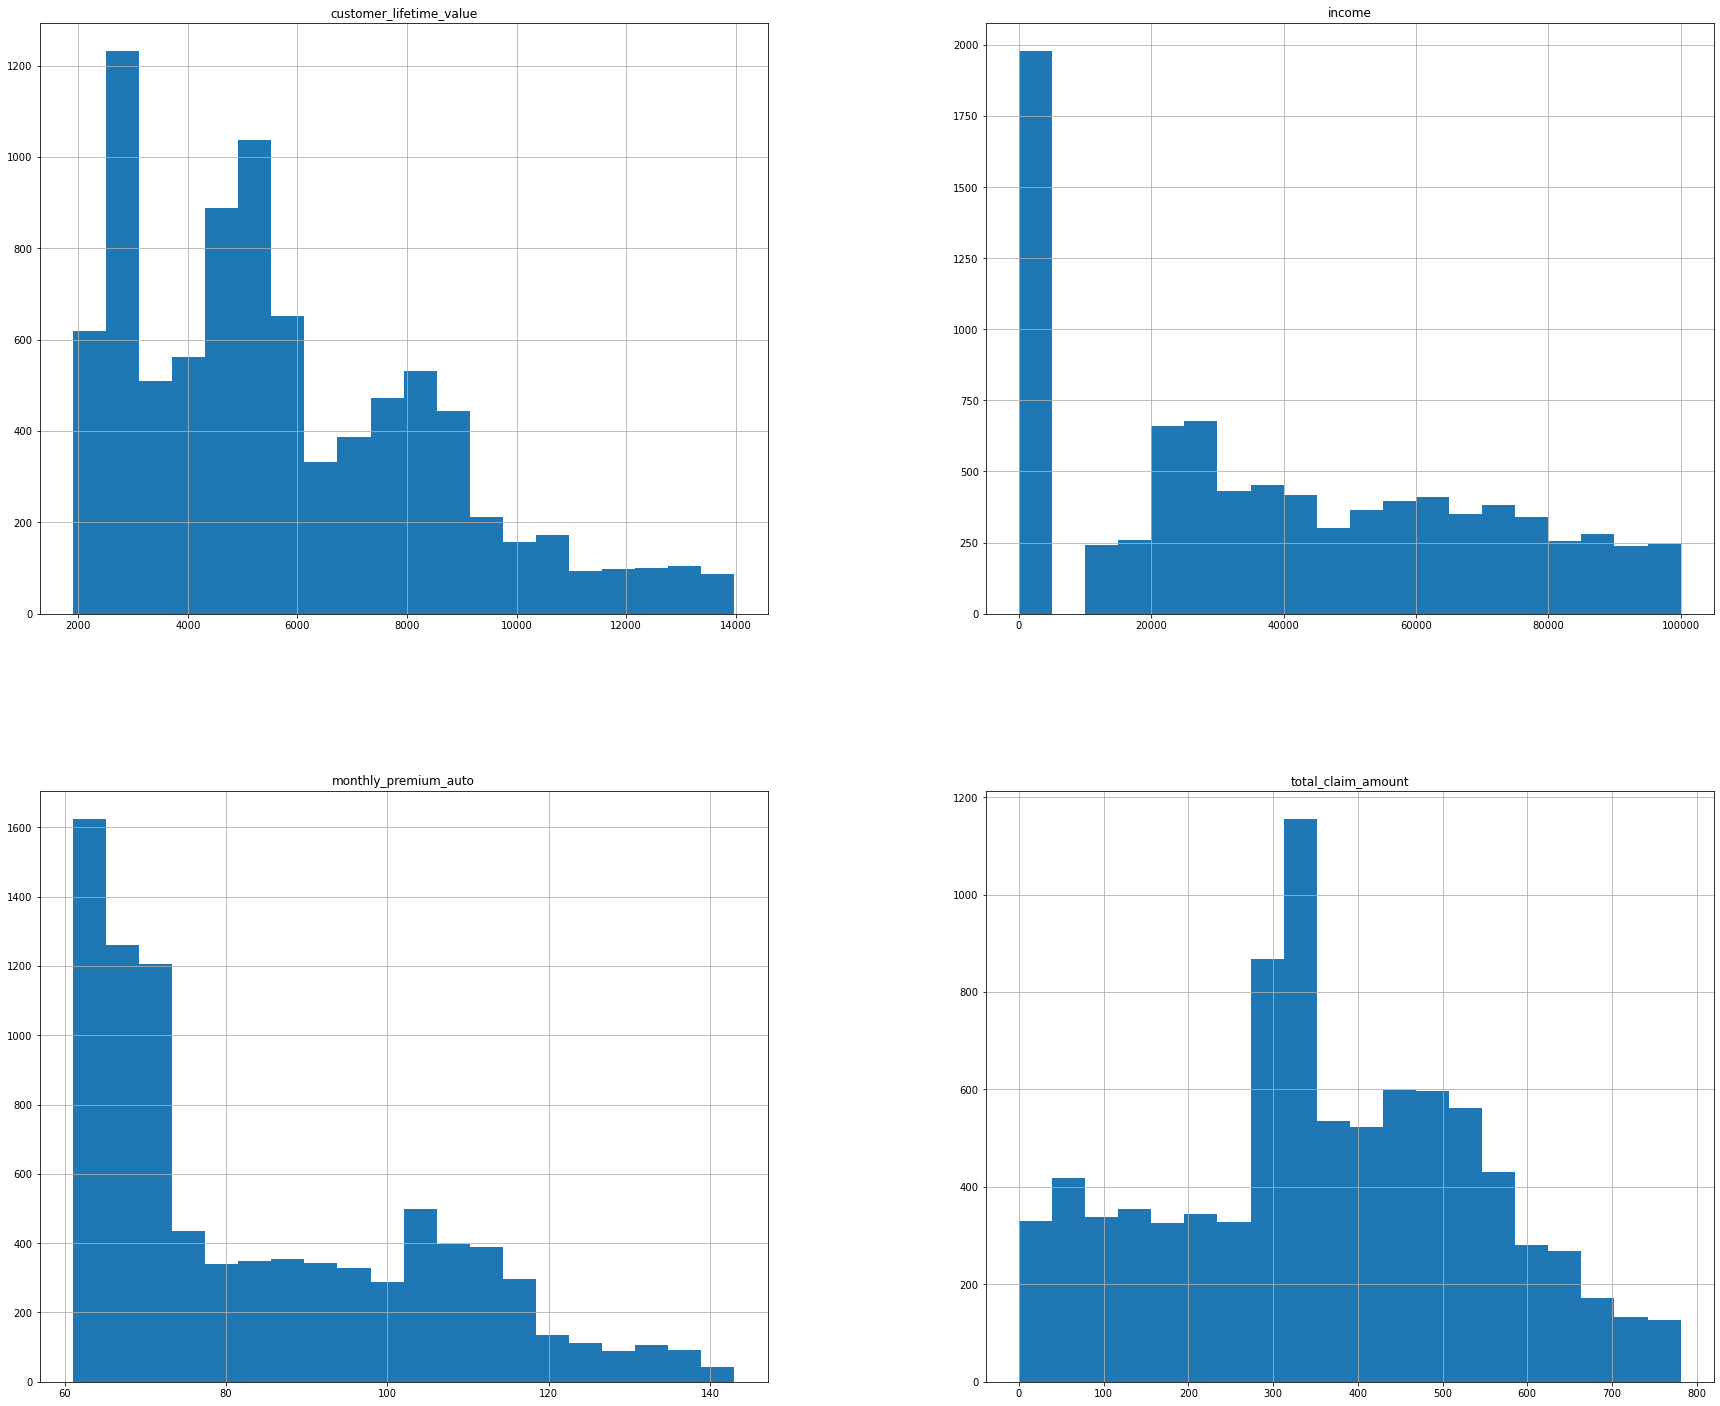

In [15]:
numerical.hist(bins=20, figsize=(30, 25))
plt.show()

I decided upon analysis to trim outliers of monthly premium auto because it has a correlation with our target and the outlier aren't meaningfull, also not even include the month.

In [16]:
# iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
# numerical = numerical[(numerical['monthly_premium_auto']>np.percentile(numerical['monthly_premium_auto'],25) - 1*iqr) & (numerical['monthly_premium_auto']<np.percentile(numerical['monthly_premium_auto'],75) + 1*iqr)].copy()

numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,8685.0,5786.386425,2756.741032,1898.007675,3500.855508,5229.741907,7687.296987,13979.090140
income,8685.0,39257.541508,30244.241071,0.000000,13528.000000,36094.000000,63860.000000,99981.000000
monthly_premium_auto,8685.0,84.303282,20.552197,61.000000,67.000000,74.000000,101.000000,143.000000
total_claim_amount,8685.0,360.739055,182.405510,0.099007,242.099049,350.400000,494.946438,780.941649


Making a heat matrix to check correlations, and establishing that the only column that seems to have a correlation with total claim amount is fact monthly premium auto.

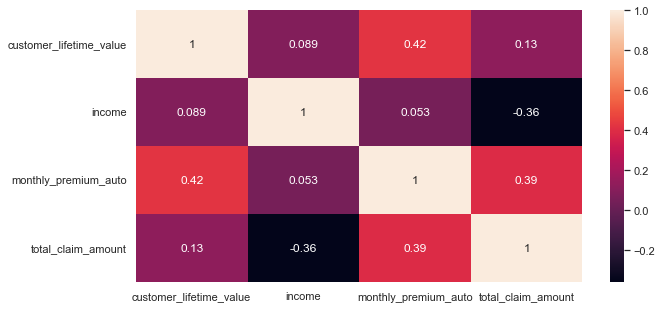

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.089217,0.421112,0.125899
income,0.089217,1.000000,0.052611,-0.361004
monthly_premium_auto,0.421112,0.052611,1.000000,0.393389
total_claim_amount,0.125899,-0.361004,0.393389,1.000000


In [17]:
correlations_matrix = numerical.corr()
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(correlations_matrix, annot=True)
plt.show()
correlations_matrix

X-y split and linear regression

R2-score is  0.15475482914116512
mean squared error (MSE) is  167.68889281986975


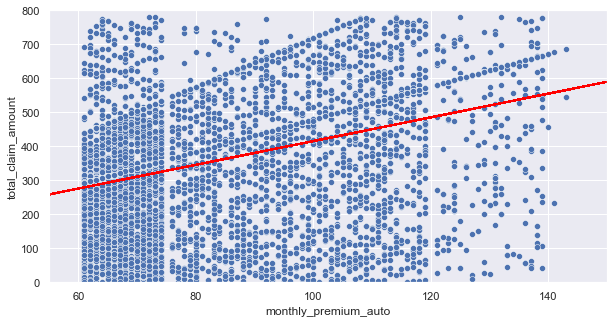

In [18]:
y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount', 'customer_lifetime_value', 'income'], axis=1)

lm = linear_model.LinearRegression()
lm.fit(X,y)

regression_line = lm.intercept_ + lm.coef_[0]*numerical['total_claim_amount']
#Results from infinity to one, usually good if values 0.5-0.85
print("R2-score is ", lm.score(X,y))

# This return the average error for each prediction
print("mean squared error (MSE) is ", np.sqrt(mean_squared_error(lm.predict(X),y)))

plt.plot(numerical['total_claim_amount'], regression_line, c = 'red')
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=numerical)
plt.xlim(55, 150)
plt.ylim(0, 800)
plt.show()

If I remove the income = 0 rows results are terrible, these results are still terrible though :\

Normalizing the numerical dataset using MinMax Scaler Method

In [19]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)


transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

x_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_premium_auto,8685.0,0.284186,0.250637,0.0,0.073171,0.158537,0.487805,1.0


In [20]:
# for i, column in enumerate(categorical.columns, 1):
#     sns.displot(categorical[column])

In [21]:
numerical.skew()

customer_lifetime_value    0.791001
income                     0.230958
monthly_premium_auto       0.777329
total_claim_amount        -0.006792
dtype: float64